<h2>Laboratory Session 3: Manipulation using NetworkX and Community Detection</h2>

**Objective:**
In this lab session, we will explore community detection algorithms using the NetworkX and other Python libraries. The primary goal is to analyze the structure of a given dataset and identify cohesive groups of nodes also known as communities.

<h3>Tasks:</h3>

**A Community Detection and Visualization:**
- **Dataset Selection:** We will start by using the Karate Club Dataset (https://docs.dgl.ai/en/2.0.x/generated/dgl.data.KarateClubDataset.html), a well-known graph dataset, or any similar dataset available.
- **Community Detection:** Implement various community detection algorithms such as Girvan-Newman, Ratio Cut, Louvain, and Label Propagation methods using NetworkX.
- **Visualization:** Visualize the detected communities using a plot. Enhance readability by suggesting alternative visualizations such as using various colors, adjusting edge thickness, or annotating nodes.

**B Evaluation and Performance Comparison:**
- **Community Quality Evaluation:** Evaluate the quality of detected communities using available metrics in NetworkX, such as modularity.
- **Algorithmic Complexity:** Measure the execution time of each community detection algorithm to compare their performance in terms of algorithmic complexity.

**C Random Graph Generation:**
- **Random Graph Generation:** Generate random graphs using the <code>gnm_random_graph()</code> function and vary the seed value to create different random graphs with the same number of nodes and edges as the Karate graph.
- **Determine communities** Apply a community detection algorithm (one of the studied above) to each random graph to identify its community structure.
- **Compare communities** Compare the community structure of each random graph with that of the Karate graph to find the one that is closest in terms of the number of partitions.

**D Overlapping Communities:**
- **Exploration of Large-Scale Datasets:** Explore dataset repositories (https://networkrepository.com/networks.php) to find an example of a large-scale overlapping graph dataset. Repeat steps done in **A** and **B** for this dataset to detect and analyze overlapping communities.
**Outcome:**
By the end of the session, we will gain a comprehensive understanding of community detection algorithms, their implementation using NetworkX, evaluation techniques, and the ability to analyze graph structures efficiently. We will also learn how to compare algorithm performance and adapt techniques for different types of datasets, including those with overlapping communities.

<h3><ol start="1"><li>Study and execute the program below for community detection and display the plot showing the communities detected from KarateClubDataset and save the result as variables.</h3></ol></li>

In [1]:
# install the Deep Graph Library (DGL) 
!pip install dgl

In [2]:
# import required libraries
import dgl
from dgl.data import KarateClubDataset
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms import community
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community.quality import partition_quality
import time

In [3]:
# Download the Karate Club dataset
karate_club_dataset = KarateClubDataset()

# Load the Karate Club graph
G = nx.karate_club_graph()

# Find communities using the Girvan-Newman algorithm
communities = girvan_newman(G)

# Convert communities to list of node groups
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print("Communities identified:")
for idx, group in enumerate(node_groups, 1):
    print(f"Community {idx}: {group}")

# Calculate modularity score
modularity_score = nx.algorithms.community.quality.modularity(G, node_groups)
print(f"Modularity score: {modularity_score:.4f}")


Communities identified:
Community 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Modularity score: 0.3477


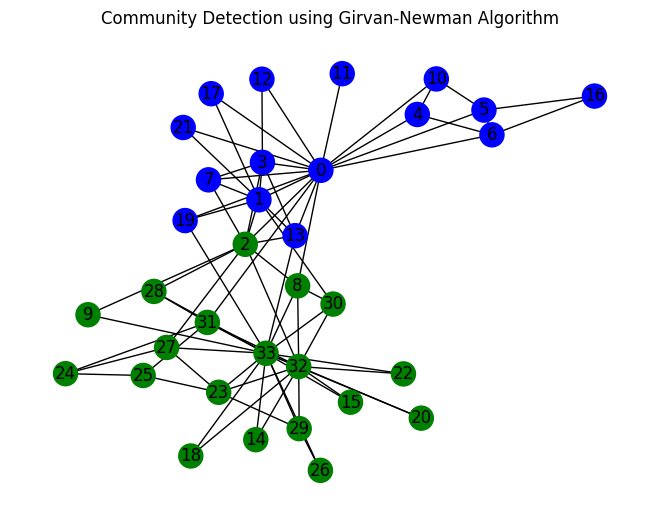

In [4]:
# Initialize color map
color_map = []

# Assign colors based on communities
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')

# Draw the graph
nx.draw(G, node_color=color_map, with_labels=True)

# Display the plot
plt.title('Community Detection using Girvan-Newman Algorithm')
plt.axis('off')
plt.show()


Suggest alternative visualization that enhances readability of the communities (various color and thickness or annotation).

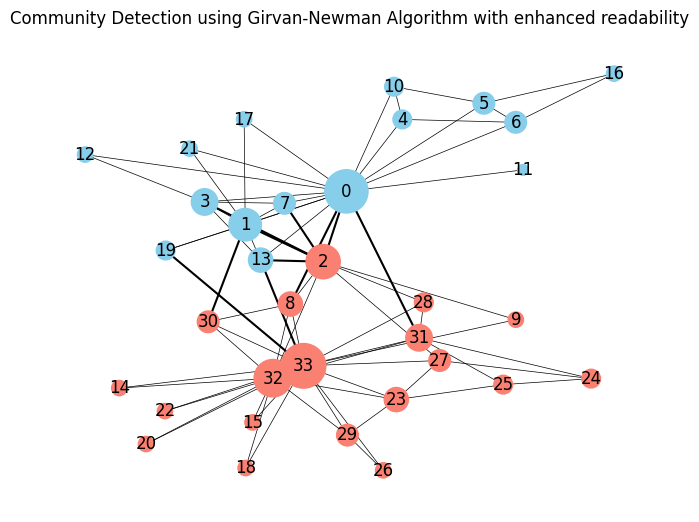

In [5]:
# Initialize color map, edge widths, and node sizes
color_map = []
edge_widths = []
node_sizes = []

# Assign colors to nodes based on community membership
for node in G:
    if node in node_groups[0]:
        color_map.append('skyblue')
    else:
        color_map.append('salmon')

# Calculate edge widths based on communities
for edge in G.edges():
    src, dst = edge
    if (src in node_groups[0] and dst in node_groups[0]) or \
            (src in node_groups[1] and dst in node_groups[1]):
        edge_widths.append(0.5)  # thin edges within the same community
    else:
        edge_widths.append(1.5)  # thick edges between different communities

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Scale degree centrality values to determine node sizes
node_sizes = [2000 * centrality for centrality in degree_centrality.values()]

# Draw the graph with community colors, adjusted edge widths, and adjusted node sizes
nx.draw(G, node_color=color_map, with_labels=True, width=edge_widths, node_size=node_sizes)

# Display the plot
plt.title('Community Detection using Girvan-Newman Algorithm with enhanced readability')
plt.axis('off')
plt.show()

<h3><ol start="2"><li> We want to study the result of community detection using Ratio Cut Method. For this purpose, use the inbuilt function in NetworkX from <code>community.kernighan_lin_bisection()</code> and display the result of the community detection, and save the result in a separate variables.</h3> </ol></li>

<h4> Ratio Cut Method</h4>
The Ratio Cut method is a graph partitioning algorithm used to divide a graph into two or more disjoint subsets, called partitions or communities, while minimizing the number of edges that cross between partitions. It aims to create partitions where the ratio of internal edges to total edges within each partition is maximized.

<h5> Partition a graph into two blocks using the Kernighan–Lin algorithm.</h5>

This algorithm partitions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets. The pairs are chosen according to a modified form of Kernighan-Lin [1], which moves node individually, alternating between sides to keep the bisection balanced.

* Reference: [1] Kernighan, B. W.; Lin, Shen (1970). “An efficient heuristic procedure for partitioning graphs.” Bell Systems Technical Journal 49: 291–307. Oxford University Press 2011.
* source code: https://networkx.org/documentation/stable/_modules/networkx/algorithms/community/kernighan_lin.html

In [6]:
# Partition the graph using Kernighan-Lin Bisection algorithm
partition = community.kernighan_lin_bisection(G)

# Collect nodes in each community into a list
node_groups = []
for community_id, nodes in enumerate(partition):
    nodes_sorted = sorted(nodes)
    node_groups.append(nodes_sorted)
    print("Community:", community_id + 1)
    print("Nodes:", nodes_sorted)

# print the list of node groups
print("Node_groups:", node_groups)

Community: 1
Nodes: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community: 2
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21]
Node_groups: [[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21]]


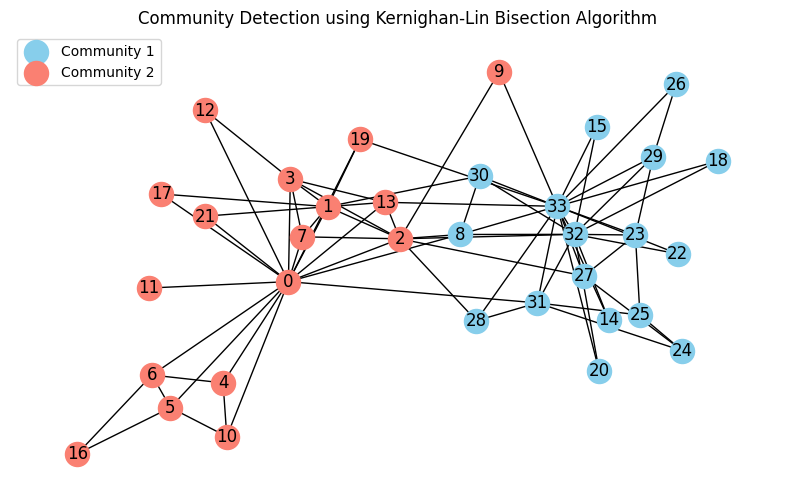

In [7]:
# Define specific colors for each community
community_colors = ['skyblue', 'salmon']

# Visualize the communities
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))

# Draw nodes for each community
for idx, (community_nodes, color) in enumerate(zip(node_groups, community_colors), 1):
    #nx.draw(G, pos, nodelist=community_nodes, node_color=color, node_size=300, label=f'Community {idx}', with_labels=True)
    nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_color=color, node_size=300, label=f'Community {idx}')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Add legend
plt.legend()

# Show plot
plt.title('Community Detection using Kernighan-Lin Bisection Algorithm')
plt.axis('off')
plt.show()

<h3> <ol start="3"><li> Repeat (2) when using the Louvain community detection algorithm, which has inbuilt function in NetworkX</h3> </ol></li>

<h4> Louvain_communities</h4>
Louvain Community Detection Algorithm is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization.

The algorithm works in 2 steps. 
* step 1 - it assigns every node to be in its own community 
* step 2 - for each node it tries to find the maximum positive modularity gain by moving each node to all of its neighbor communities. If no positive gain is achieved the node remains in its original community.

In [8]:
# Use the Louvain community detection algorithm
communities = nx.community.louvain_communities(G, seed=123)

# Collect nodes in each community into a list
node_groups = [list(community) for community in communities]

# Print out the communities
for idx, community_nodes in enumerate(communities, 1):
    print(f"Community {idx}: {community_nodes}")

Community 1: {1, 2, 3, 7, 12, 13}
Community 2: {0, 4, 5, 6, 10, 11, 16, 17, 19, 21}
Community 3: {23, 24, 25, 27, 28, 31}
Community 4: {32, 33, 8, 9, 14, 15, 18, 20, 22, 26, 29, 30}


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


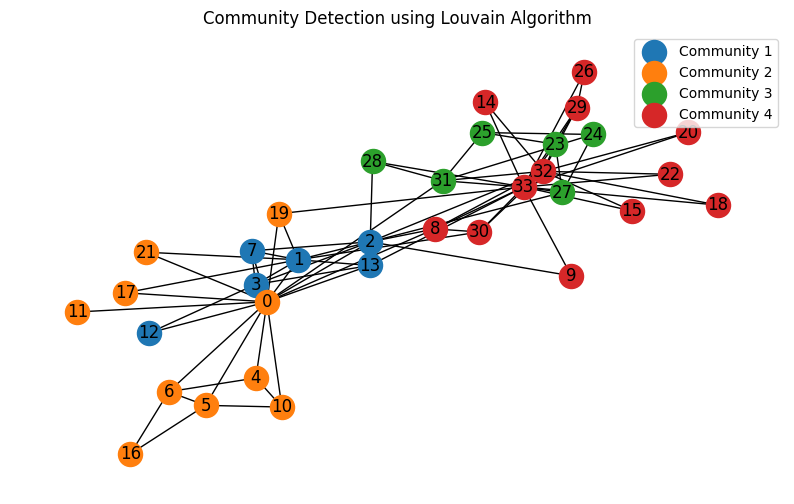

In [9]:
# Define specific colors for each community using a predefined colormap
colors = plt.cm.tab10.colors
community_colors = {i: colors[i % len(colors)] for i in range(len(node_groups))}

# Visualize the communities
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))

# Draw nodes for each community
for idx, (community_nodes, color) in enumerate(zip(node_groups, community_colors.values()), 1):
    nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_color=color, node_size=300, label=f'Community {idx}')
# Draw edges and labels
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Add legend
plt.legend()

# Show plot
plt.title('Community Detection using Louvain Algorithm')
plt.axis('off')
plt.show()

<h3> <ol start="4"><li> Repeat (2) using label-propagation community detection algorithm.</h3> </ol></li>

<h4> Label-propagation community detection algorithm</h4>

Generates community sets determined by label propagation. Finds communities in G using a semi-synchronous label propagation method [1]. This method combines the advantages of both the synchronous and asynchronous models. Not implemented for directed graphs.
Reference: 
* [1] Cordasco, G., & Gargano, L. (2010, December). Community detection via semi-synchronous label propagation algorithms. In Business Applications of Social Network Analysis (BASNA), 2010 IEEE International Workshop on (pp. 1-8). IEEE.

In [10]:
# Perform community detection using Label Propagation Method
communities = nx.community.label_propagation_communities(G)

# Collect nodes in each community into a list
node_groups = [list(community) for community in communities]

# Print out the communities
for idx, community_nodes in enumerate(communities, 1):
    print(f"Community {idx}: {community_nodes}")

Community 1: {0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}
Community 2: {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}
Community 3: {16, 5, 6}


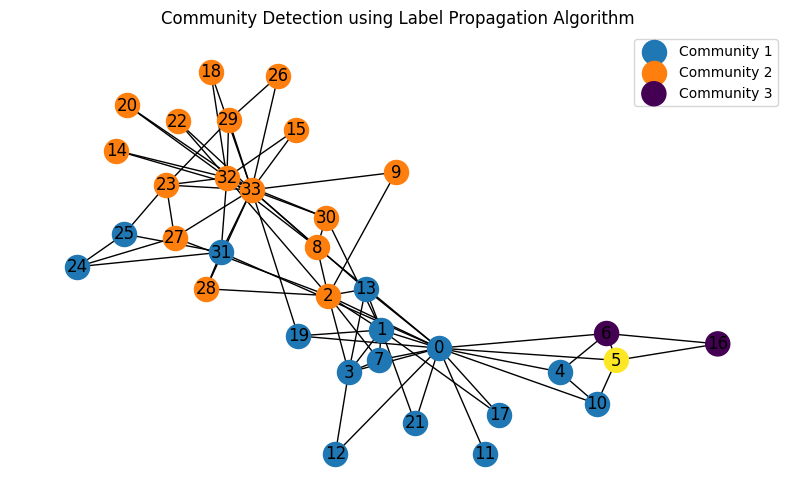

In [11]:
# Define specific colors for each community using a predefined colormap
colors = plt.cm.tab10.colors
community_colors = {i: colors[i % len(colors)] for i in range(len(node_groups))}

# Visualize the communities
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 6))

# Draw nodes for each community
for idx, (community_nodes, color) in enumerate(zip(node_groups, community_colors.values()), 1):
    nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_color=color, node_size=300, label=f'Community {idx}')
# Draw edges and labels
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Add legend
plt.legend()

# Show plot
plt.title('Community Detection using Label Propagation Algorithm')
plt.axis('off')
plt.show()

<h3> <ol start="5"><li> We want to evaluate the quality of the communities detected in (1)-(4). For this purpose, study the  available community quality performance algorithms inbuilt in NetworkX and write a script that outputs the quality performance(s) for each of the detection algorithm (Girvan Neuman, Ratio Cut, label propagation and Louvain method). </h3> </ol></li>

<h4> Modularity</h4>
Returns the modularity of the given partition of the graph.
Measures the degree to which the network is partitioned into clearly delineated communities. Higher modularity values indicate better community structure.

<h4>Partition_quality</h4>
Returns the coverage and performance of a partition of G.

In [12]:
# Define the community detection algorithms to evaluate
algorithms = {
    'Girvan-Newman': next(girvan_newman(G)),
    'Ratio Cut (Kernighan-Lin Bisection)': community.kernighan_lin_bisection(G),
    'Louvain': nx.community.louvain_communities(G),
    'Label Propagation': nx.community.label_propagation_communities(G)
    # Add more algorithms as needed
}

# Calculate modularity score for each algorithm
for algorithm_name, communities in algorithms.items():
    modularity_score = modularity(G, communities)
    print(f"Modularity for {algorithm_name}: {modularity_score:.4f}")

Modularity for Girvan-Newman: 0.3477
Modularity for Ratio Cut (Kernighan-Lin Bisection): 0.3998
Modularity for Louvain: 0.4439
Modularity for Label Propagation: 0.3095


The modularity scores indicate that the Louvain Method performed the best in identifying communities within the network, followed by Ratio Cut, Girvan-Newman, and Label Propagation.

<h3> <ol start="6"><li> We want to compare the performance of the algorithms in (1-4) in terms of algorithmic complexity. For this purpose, write a script that reports the execution time of each algortihm (Girvan Neuman, Ratio Cut, label propagation  and Louvan method).</h3> </ol></li>

In [13]:
# Define the community detection algorithms to evaluate
algorithms = {
    'Girvan-Newman': girvan_newman,
    'Ratio Cut (Kernighan-Lin Bisection)': community.kernighan_lin_bisection,
    'Louvain': nx.community.louvain_communities,
    'Label Propagation': nx.community.label_propagation_communities
    # Add more algorithms as needed
}
    
# Measure the execution time of each algorithm
for algorithm_name, algorithm_func in algorithms.items():
    start_time = time.time()  # Record start time
    if algorithm_name == 'Girvan-Newman':
        communities = next(algorithm_func(G))  # Execute the algorithm
    else:
        communities = algorithm_func(G)
    end_time = time.time()  # Record end time
    execution_time = end_time - start_time  # Calculate elapsed time
    print(f"Algorithm: {algorithm_name}, Execution Time: {execution_time:.8f} seconds")

Algorithm: Girvan-Newman, Execution Time: 0.02177358 seconds
Algorithm: Ratio Cut (Kernighan-Lin Bisection), Execution Time: 0.00100017 seconds
Algorithm: Louvain, Execution Time: 0.00099802 seconds
Algorithm: Label Propagation, Execution Time: 0.00000000 seconds


<h3> <ol start="7"><li> We want to seek a random graph that has close characteristic to Karate graph in terms of communities. For this purpose, use the function <code>gnm_random_graph( )</code> where n corresponds to the total number of nodes of Karate graph and m is the total number of edges of the Karate graph. Write a script that generates various random graph by varying the seed value of the gnm_random_graph function and determine for each graph its corresponding communities using one of the algorithms studied above. Determine the random graph that is close enough in terms of number of partition to Karate dataset.</h3></ol></li>

In [14]:
# find the number of nodes and edges of karate graph
num_of_nodes = G.number_of_nodes()
num_of_edges = G.number_of_edges()
print("Number of nodes in karate graph :", num_of_nodes)
print("Number of edges in karate graph :", num_of_edges)

Number of nodes in karate graph : 34
Number of edges in karate graph : 78


Communities for Graph 1 (Seed=0):
Community 1: [0, 32, 3, 6, 10, 13, 19, 22, 24, 25, 26, 27, 30, 31]
Community 2: [1, 2, 4, 5, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 23, 28, 29, 33]


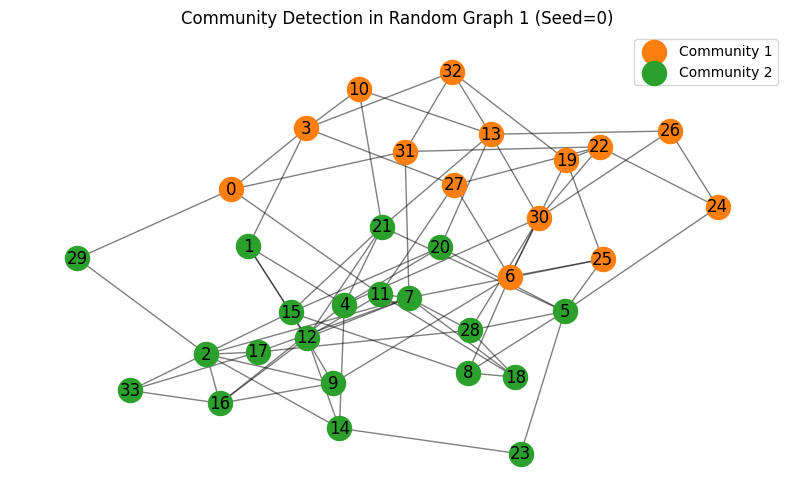

Communities for Graph 2 (Seed=1):
Community 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


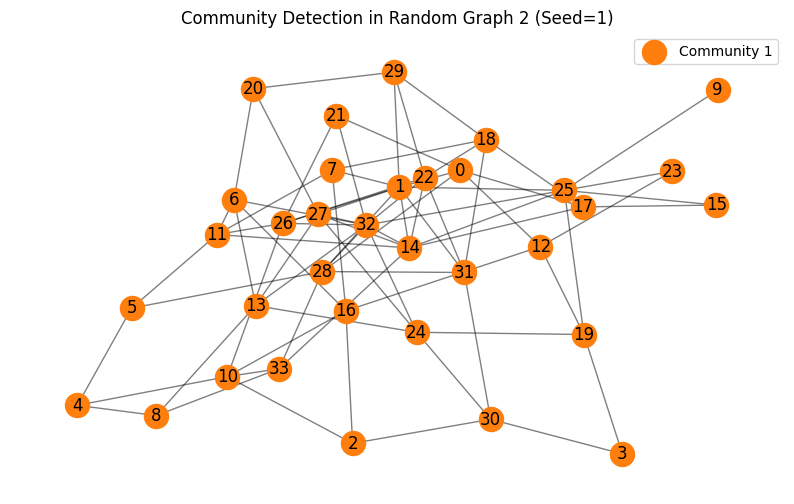

Communities for Graph 3 (Seed=2):
Community 1: [0, 24, 12]
Community 2: [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community 3: [18, 7]


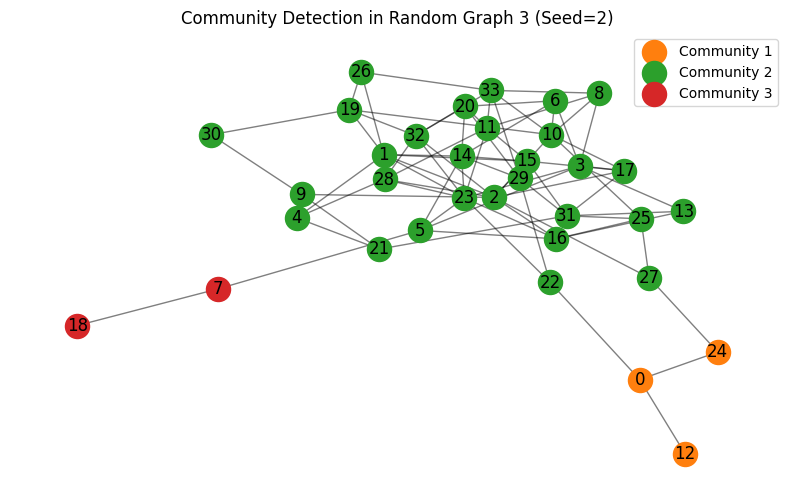

Communities for Graph 4 (Seed=3):
Community 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


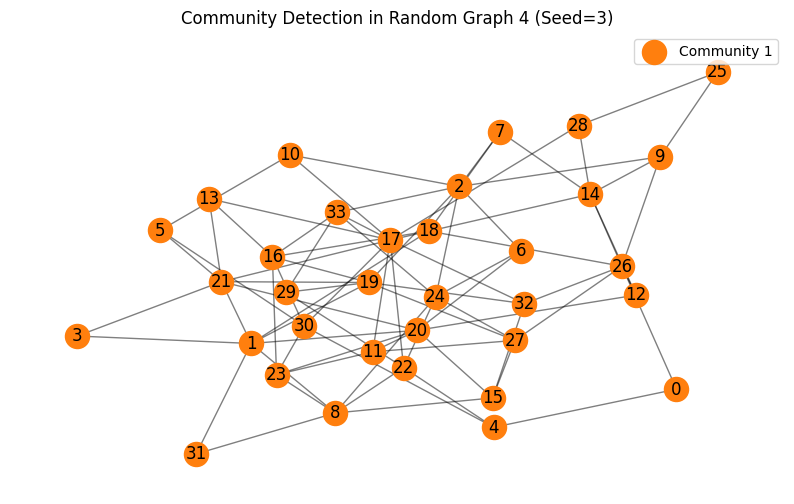

Communities for Graph 5 (Seed=4):
Community 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


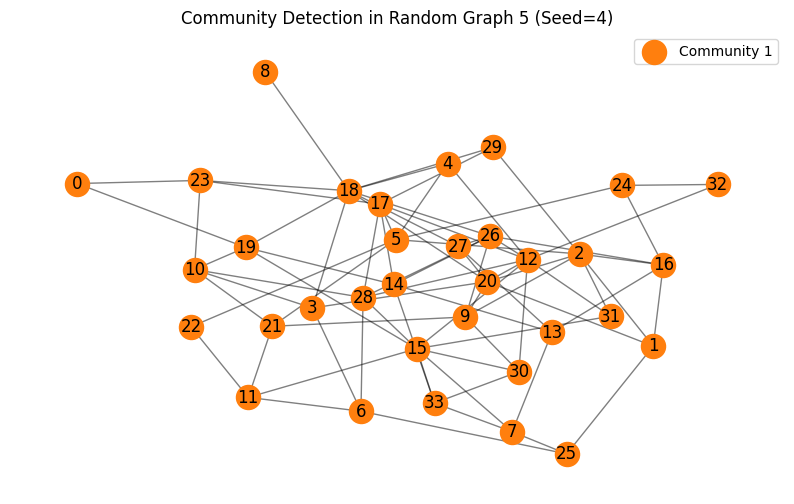

In [15]:
# Define parameters for random graph generation
num_nodes = num_of_nodes
num_edges = num_of_edges
num_graphs = 5  # Number of random graphs to generate

# Define the community detection algorithm
community_detection_algorithm = community.label_propagation_communities

# Generate and analyze random graphs with varying seed values
for i in range(num_graphs):
    # Generate a random graph with a different seed value each time
    seed_value = i
    random_graph = nx.gnm_random_graph(num_nodes, num_edges, seed=seed_value)
    
    # Detect communities using the specified algorithm
    communities = list(community_detection_algorithm(random_graph))
    
    # Print the communities detected for the current graph
    print(f"Communities for Graph {i + 1} (Seed={seed_value}):")
    for idx, comm in enumerate(communities):
        print(f"Community {idx + 1}: {list(comm)}")
    
    # Visualize the communities
    pos = nx.spring_layout(random_graph)
    plt.figure(figsize=(10, 6))

    # Draw nodes for each community
    for idx, community_nodes in enumerate(communities, 1):
        nx.draw_networkx_nodes(random_graph, pos, nodelist=community_nodes, node_color=f'C{idx}', node_size=300, label=f'Community {idx}')
    nx.draw_networkx_edges(random_graph, pos, width=1.0, alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(random_graph, pos)

    # Add legend
    plt.legend()

    # Show plot
    plt.title(f'Community Detection in Random Graph {i + 1} (Seed={seed_value})')
    plt.axis('off')
    plt.show()


<h3> <ol start="8"><li> We want to repeat (1-6) when using overlapping communities. For this purpose, explore the dataset repositories of graph dataset provided in course handout and suggest an example of large scale overlapping graph dataset of your choice and repeat the steps (1-6).</h3> </ol></li>
<h4>NETWORK DATASETS: <a>https://networkrepository.com/networks.php</a></h4>

In [16]:
# For this section we have selected: https://networkrepository.com/inf-USAir97.php 
# For better understanding of the dataset visit: https://www.cise.ufl.edu/research/sparse/matrices/Pajek/USAir97.html

# Initialize an empty graph
G = nx.Graph()

# Path to the text file containing edges
file_path = r".\inf-USAir97\inf-USAir97.mtx"  # download the file from https://networkrepository.com/inf-USAir97.php

# Read the .edges file and add edges to the graph
with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith('%'):
            # Strip whitespace and split the line into nodes
            nodes = line.strip().split()
            if len(nodes) >= 2:
                node1 = nodes[0]
                node2 = nodes[1]
                G.add_edge(node1, node2)

# Print basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 332
Number of edges: 2127


Modularity for Girvan-Newman: 0.0204
Modularity for Ratio Cut (Kernighan-Lin Bisection): 0.1088
Modularity for Louvain: 0.3573
Modularity for Label Propagation: 0.0728
Algorithm: Girvan-Newman, Execution Time: 1.21856356 seconds
Algorithm: Ratio Cut (Kernighan-Lin Bisection), Execution Time: 0.00000000 seconds
Algorithm: Louvain, Execution Time: 0.01639724 seconds
Algorithm: Label Propagation, Execution Time: 0.01506901 seconds


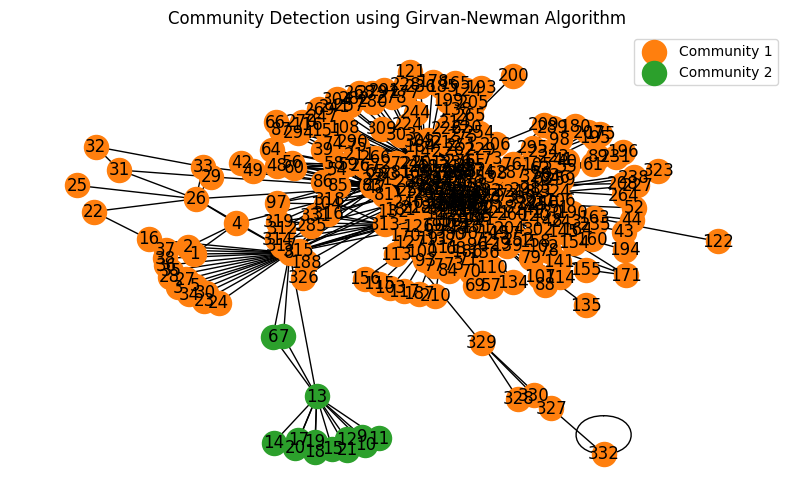

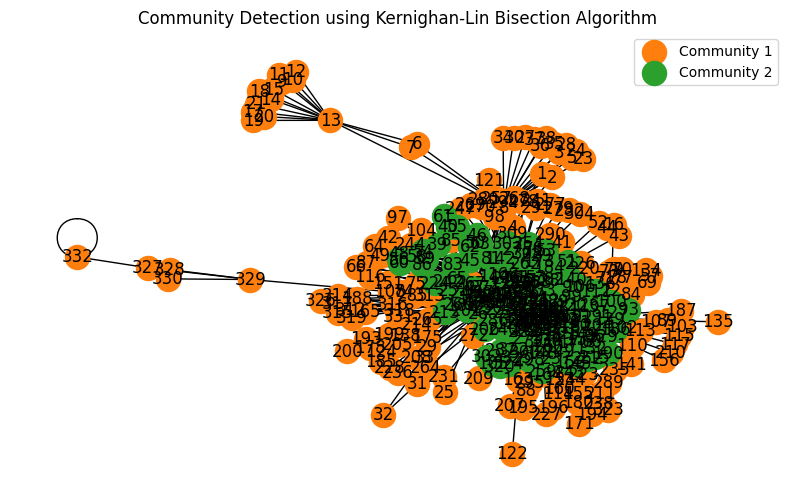

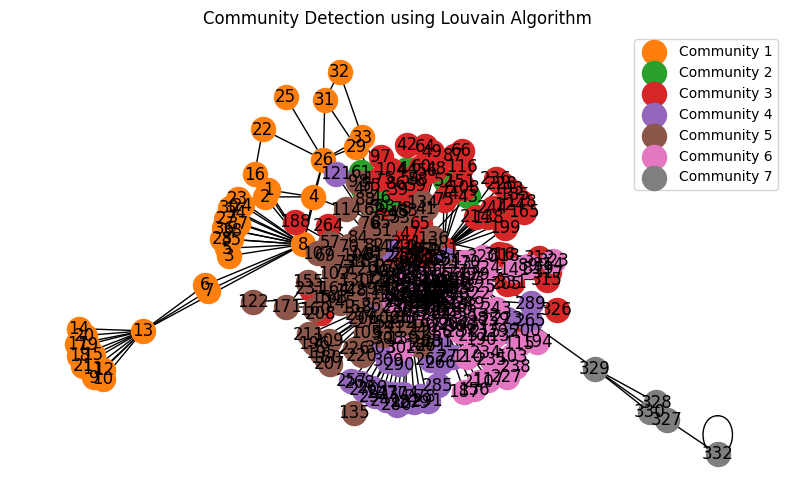

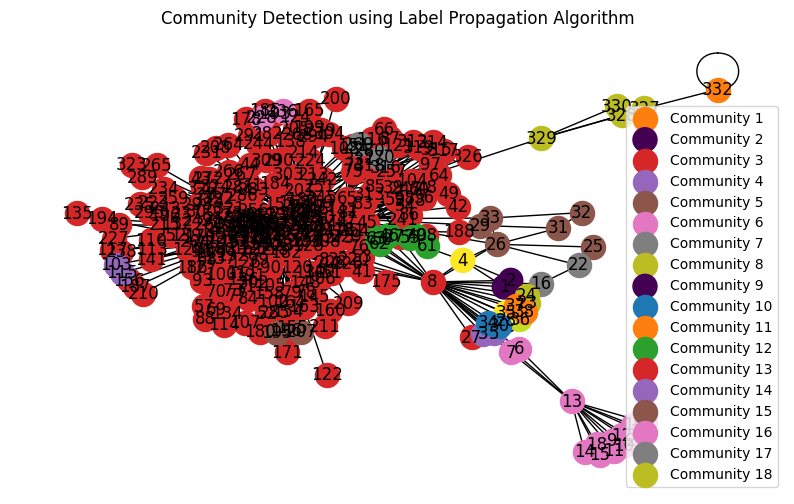

In [17]:
# Evaluate modularity scores for each algorithm
algorithms = {
    'Girvan-Newman': next(girvan_newman(G)),
    'Ratio Cut (Kernighan-Lin Bisection)': community.kernighan_lin_bisection(G),
    'Louvain': list(nx.community.louvain_communities(G)),
    'Label Propagation': list(nx.community.label_propagation_communities(G))
}

for algorithm_name, communities in algorithms.items():
    modularity_score = modularity(G, communities)
    print(f"Modularity for {algorithm_name}: {modularity_score:.4f}")

# Measure the execution time of each algorithm
algorithms = {
    'Girvan-Newman': girvan_newman,
    'Ratio Cut (Kernighan-Lin Bisection)': community.kernighan_lin_bisection,
    'Louvain': nx.community.louvain_communities,
    'Label Propagation': nx.community.label_propagation_communities
}

for algorithm_name, algorithm_func in algorithms.items():
    start_time = time.time()  
    if algorithm_name == 'Girvan-Newman':
        communities = next(algorithm_func(G))
    else:
        communities = algorithm_func(G)
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Algorithm: {algorithm_name}, Execution Time: {execution_time:.8f} seconds")


def visualize_communities(G, communities, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
    colors = plt.cm.tab10.colors
    for idx, community_nodes in enumerate(communities, 1):
        nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_color=colors[idx % len(colors)], node_size=300, label=f'Community {idx}')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.legend()
    plt.title(title)
    plt.axis('off')
    plt.show()

# Girvan-Newman algorithm
communities = next(girvan_newman(G))
visualize_communities(G, communities, 'Community Detection using Girvan-Newman Algorithm')

# Kernighan-Lin Bisection algorithm
partition = community.kernighan_lin_bisection(G)
node_groups = [sorted(nodes) for nodes in partition]
# print("Node_groups:", node_groups)
visualize_communities(G, node_groups, 'Community Detection using Kernighan-Lin Bisection Algorithm')

# Louvain algorithm
communities = list(nx.community.louvain_communities(G))
visualize_communities(G, communities, 'Community Detection using Louvain Algorithm')

# Label Propagation Method
communities = list(nx.community.label_propagation_communities(G))
visualize_communities(G, communities, 'Community Detection using Label Propagation Algorithm')
